All of the code presented in this notoebook is derived from or based on the O'Reilly&reg; book Introduction to Machine Learning with Python &copy; 2017 by Andreas C. Muller and Sarah Guido.  Please make sure you present the correct attestation to this book if you reference or utilize any of the information in this notebook.  And please buy the book, it's excellent!

A notebook to collect interesting graphs and plots

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D, axes3d

Plot of decision boundary by linearSVM for dataset with 3 features

Text(0.5, 0, 'f 2')

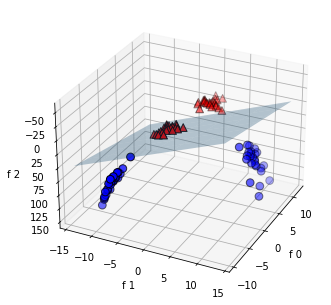

In [3]:
# Generate a data set with 3 features
X,y = make_blobs(centers=4,random_state=8)
y = y % 2;
X = np.hstack([X, X[:,1:] ** 2]) # Add the new feature

# Train the model
linear_svm_3d = LinearSVC(max_iter=5000).fit(X,y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

# Start the plot
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

# Plot the data set across the 3 features
mask = y == 0
ax.scatter(X[mask,0], X[mask,1], X[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X[~mask,0], X[~mask,1], X[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

# Plot the plane of the decision boundary
xx = np.linspace(X[:,0].min()-2, X[:,0].max()+2,50)
yy = np.linspace(X[:,1].min()-2, X[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("f 0")
ax.set_ylabel("f 1")
ax.set_zlabel("f 2")

Decision boundary for neural network

Text(0, 0.5, 'f 1')

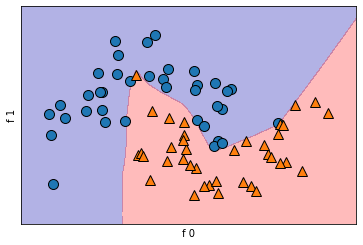

In [4]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel('f 0')
plt.ylabel('f 1')